# Algorithme k-means  
## Sur des données de test  
----

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

/home/guillaume/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
class Point():
    
    def __init__(self, coords, color='black'):
        self.coords = coords
        self.x = self.coords[0]
        self.y = self.coords[1]
        self.color = color

In [3]:
p1 = Point([1.5, 2], 'b')
p2 = Point([1, 1], 'b')
p3 = Point([3, 4], 'b')

p4 = Point([8, 5], 'r')
p5 = Point([9, 5.5], 'r')
p6 = Point([7.5, 6], 'r')

p7 = Point([1, 7], 'g')
p8 = Point([4, 9], 'g')
p9 = Point([3, 8], 'g')

L = [p1, p2, p3, p4, p5, p6, p7, p8, p9]

X = [p.x for p in L]
Y = [p.y for p in L]
colors = [p.color for p in L]
df = pd.DataFrame({'X':X, 'Y':Y, 'colors':colors})

In [4]:
df

,X,Y,colors
0,1.5,2.0,b
1,1.0,1.0,b
2,3.0,4.0,b
3,8.0,5.0,r
4,9.0,5.5,r
5,7.5,6.0,r
6,1.0,7.0,g
7,4.0,9.0,g
8,3.0,8.0,g


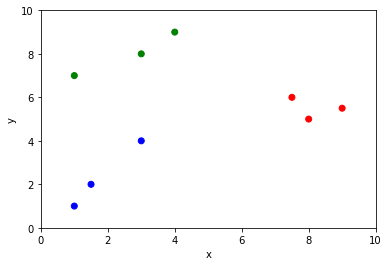

In [5]:
plt.scatter(df['X'], df['Y'], c=colors)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

----

In [6]:
class KMeans:
    
    def __init__(self, n_clusters=2):
        self.K = n_clusters
        
    def fit1(self, X):
        """
        On itère tant que les labels ne changent pas d'une itération à une autre.
        """
        self.centroids = np.array(X.iloc[np.random.choice(len(X), self.K, replace=False)])
        self.initial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.prev_label) :
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self
    
    def fit2(self, X):
        """
        On fait un nombre fixe d'itérations. Ici 10, mais pourrait être passé en paramètre.
        """
        self.centroids = np.array(X.iloc[np.random.choice(len(X), self.K, replace=False)])
        self.initial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        for iter in range(50):
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self
        
    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return self.euclidian_dist(x).argmin()
    
    def euclidian_dist(self, x):
        return np.sqrt(np.sum((x - self.centroids)**2, axis=1))

    def update_centroid(self, X):
        self.centroids = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])
        
kmeans = KMeans(3)

In [7]:
X = df.loc[:,['X','Y']]
X;

In [8]:
kmeans = KMeans(3)
kmeans.fit1(X)
kmeans.labels

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [9]:
kmeans = KMeans(3)
kmeans.fit2(X)
kmeans.labels

array([1, 1, 1, 0, 0, 0, 2, 2, 2])

In [10]:
kmeans.centroids

array([[8.16666667, 5.5       ],
       [1.83333333, 2.33333333],
       [2.66666667, 8.        ]])

In [11]:
p10 = Point([5, 5])
p11 = Point([8, 8])

pC1 = Point(kmeans.centroids[0])
pC2 = Point(kmeans.centroids[1])
pC3 = Point(kmeans.centroids[2])

In [12]:
# Pour obtenir le label d'un nouveau point
kmeans.compute_label(pC2.coords)

1

----

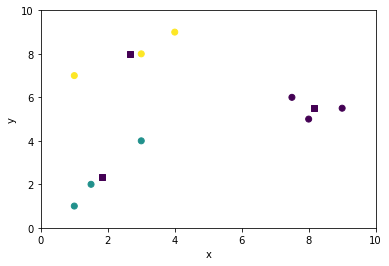

In [13]:
cmap = {0:'b', 1:'r', 2:'g'}

plt.scatter(df['X'], df['Y'], c=kmeans.labels)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(0, 10)

# plt.scatter(p10.x, p10.y, c=kmeans.compute_label(p10.coords), cmap=cmap)
# plt.scatter(p11.x, p11.y, c=kmeans.compute_label(p11.coords), cmap=cmap)

plt.scatter(pC1.x, pC1.y, c=kmeans.compute_label(pC1.coords), marker='s')
plt.scatter(pC2.x, pC2.y, c=kmeans.compute_label(pC2.coords), marker='s')
plt.scatter(pC3.x, pC3.y, c=kmeans.compute_label(pC3.coords), marker='s')
plt.show()

In [14]:
print('dist(p10,pC1) :',np.sqrt(np.sum((p10.coords - pC1.coords)**2)))
print('dist(p10,pC2) :',np.sqrt(np.sum((p10.coords - pC2.coords)**2)))
print('dist(p10,pC3) :',np.sqrt(np.sum((p10.coords - pC3.coords)**2)))
print()
print('dist(p11,pC1) :',np.sqrt(np.sum((p11.coords - pC1.coords)**2)))
print('dist(p11,pC2) :',np.sqrt(np.sum((p11.coords - pC2.coords)**2)))
print('dist(p11,pC3) :',np.sqrt(np.sum((p11.coords - pC3.coords)**2)))

dist(p10,pC1) : 3.2058973436118903
dist(p10,pC2) : 4.139914116124741
dist(p10,pC3) : 3.80058475033046

dist(p11,pC1) : 2.5055493963954847
dist(p11,pC2) : 8.374896350934074
dist(p11,pC3) : 5.333333333333334


----

In [15]:
def compute_label(x):
    return np.sqrt(np.sum((x - centroids)**2, axis=1)).argmin()

X = df.loc[:,['X','Y']]
centroids = np.array(X.iloc[np.random.choice(len(X), 3, replace=False)])

labels = np.apply_along_axis(compute_label, 1, X)
labels

array([0, 0, 0, 2, 2, 2, 0, 1, 1])

In [16]:
centroids

array([[1., 7.],
       [3., 8.],
       [8., 5.]])

In [17]:
new_centroids = np.array([np.mean(X[labels == k], axis=0)  for k in range(3)])
new_centroids

array([[1.625     , 3.5       ],
       [3.5       , 8.5       ],
       [8.16666667, 5.5       ]])

In [18]:
df.iloc[np.random.choice(len(df), 3, replace=False)]

,X,Y,colors
4,9.0,5.5,r
0,1.5,2.0,b
3,8.0,5.0,r


In [19]:
df.sample(3, random_state=42)

,X,Y,colors
7,4.0,9.0,g
1,1.0,1.0,b
5,7.5,6.0,r
